## Context
Uber Technologies, Inc. is an American multinational transportation network company based in San Francisco and has operations in approximately 72 countries and 10,500 cities. In the fourth quarter of 2021, Uber had 118 million monthly active users worldwide and generated an average of 19 million trips per day.

Ridesharing is a very volatile market and demand fluctuates wildly with time, place, weather, local events, etc. The key to being successful in this business is to be able to detect patterns in these fluctuations and cater to demand at any given time.

As a newly hired Data Scientist in Uber's New York Office, you have been given the task of extracting insights from data that will help the business better understand the demand profile and take appropriate actions to drive better outcomes for the business. Your goal is to identify good insights that are potentially actionable, i.e., the business can do something with it.

## Objective
To extract actionable insights around demand patterns across various factors.

## Key Questions
1. What are the different variables that influence pickups?

2. Which factor affects the pickups the most? What could be plausible reasons for that?

3. What are your recommendations to Uber management to capitalize on fluctuating demand?

## Guidelines
1. Perform univariate analysis on the data to better understand the variables at your disposal.

2. Perform bivariate analysis to better understand the relationships between different variables.

3. Create visualizations to explore data and extract the insights.

## Data Dictionary
The data contains information about the weather, location, and pickups.

* pickup_dt: Date and time of the pick-up
* borough: NYC's borough
* pickups: Number of pickups for the period
* spd: Wind speed in miles/hour
* vsb: Visibility in miles to the nearest tenth
* temp: Temperature in Fahrenheit
* dewp: Dew point in Fahrenheit
* slp: Sea level pressure
* pcp01: 1-hour liquid precipitation
* pcp06: 6-hour liquid precipitation
* pcp24: 24-hour liquid precipitation
* sd: Snow depth in inches
* hday: Being a holiday (Y) or not (N)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("uber_data.csv")

In [ ]:
df = data.copy()
df.head()
df

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [ ]:
df.shape

(29101, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29101 non-null  int64  
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pickups,29101.0,490.215903,995.649536,0.0,1.0,54.0,449.000000,7883.00
spd,29101.0,5.984924,3.699007,0.0,3.0,6.0,8.000000,21.00
vsb,29101.0,8.818125,2.442897,0.0,9.1,10.0,10.000000,10.00
temp,29101.0,47.669042,19.814969,2.0,32.0,46.0,64.500000,89.00
dewp,29101.0,30.823065,21.283444,-16.0,14.0,30.0,50.000000,73.00
slp,29101.0,1017.817938,7.768796,991.4,1012.5,1018.2,1022.900000,1043.40
pcp01,29101.0,0.003830,0.018933,0.0,0.0,0.0,0.000000,0.28
pcp06,29101.0,0.026129,0.093125,0.0,0.0,0.0,0.000000,1.24
pcp24,29101.0,0.090464,0.219402,0.0,0.0,0.0,0.050000,2.10
sd,29101.0,2.529169,4.520325,0.0,0.0,0.0,2.958333,19.00


In [ ]:
df.describe(exclude = "number").T

,count,unique,top,freq
pickup_dt,29101,4343,2015-01-01 01:00:00,7
borough,26058,6,Bronx,4343
hday,29101,2,N,27980


In [ ]:
cat_col = ['borough', 'hday']

for column in cat_col:
  print(df[column].value_counts())

  print('-' * 50)


borough
Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: count, dtype: int64
--------------------------------------------------
hday
N    27980
Y     1121
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
df.pickup_dt = pd.to_datetime(df.pickup_dt)

df['start_year'] = df.pickup_dt.dt.year
df['start_month'] = df.pickup_dt.dt.month_name()
df['start_hour'] = df.pickup_dt.dt.hour
df['start_day'] = df.pickup_dt.dt.day
df['week_day'] = df.pickup_dt.dt.day_name()

df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,start_year,start_month,start_hour,start_day,week_day
29096,2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29097,2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29098,2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29099,2015-06-30 23:00:00,Staten Island,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday
29100,2015-06-30 23:00:00,NaN,3,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N,2015,June,23,30,Tuesday


In [ ]:
df.drop('pickup_dt', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   borough      26058 non-null  object 
 1   pickups      29101 non-null  int64  
 2   spd          29101 non-null  float64
 3   vsb          29101 non-null  float64
 4   temp         29101 non-null  float64
 5   dewp         29101 non-null  float64
 6   slp          29101 non-null  float64
 7   pcp01        29101 non-null  float64
 8   pcp06        29101 non-null  float64
 9   pcp24        29101 non-null  float64
 10  sd           29101 non-null  float64
 11  hday         29101 non-null  object 
 12  start_year   29101 non-null  int32  
 13  start_month  29101 non-null  object 
 14  start_hour   29101 non-null  int32  
 15  start_day    29101 non-null  int32  
 16  week_day     29101 non-null  object 
dtypes: float64(9), int32(3), int64(1), object(4)
memory usage: 3.4+ MB


In [ ]:
df.shape

(29101, 17)

In [ ]:
df.isna().sum()

,0
borough,3043
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [ ]:
df.borough.value_counts(normalize = True, dropna = False)

,proportion
borough,
Bronx,0.149239
Brooklyn,0.149239
EWR,0.149239
Manhattan,0.149239
Queens,0.149239
Staten Island,0.149239
NaN,0.104567


In [ ]:
df['borough'].fillna('Unknown', inplace = True)

<ipython-input-44-b4da07862a68>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['borough'].fillna('Unknown', inplace = True)


In [ ]:
df.borough.value_counts()

,count
borough,
Bronx,4343
Brooklyn,4343
EWR,4343
Manhattan,4343
Queens,4343
Staten Island,4343
Unknown,3043


In [ ]:
df.isnull().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


In [ ]:
df.isna().sum()

,0
borough,0
pickups,0
spd,0
vsb,0
temp,0
dewp,0
slp,0
pcp01,0
pcp06,0
pcp24,0


### Task 1
Plot a multivariate charts between variables to understand their interaction with each other.

In [ ]:
num_var = ['pickups','spd','vsb','temp','dewp','slp','pcp01','pcp06','pcp24','sd']
corr = df[num_var].corr()
corr.head()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickups,1.000000,0.011103,-0.007484,0.054857,0.033456,-0.015011,0.004406,-0.002909,-0.020219,-0.008241
spd,0.011103,1.000000,0.089056,-0.294548,-0.321730,-0.091698,-0.000250,0.016266,-0.010563,0.097919
vsb,-0.007484,0.089056,1.000000,0.023981,-0.232188,0.165451,-0.487121,-0.117681,0.000323,-0.048110
temp,0.054857,-0.294548,0.023981,1.000000,0.896665,-0.224439,-0.012767,-0.037722,-0.014382,-0.548750
dewp,0.033456,-0.321730,-0.232188,0.896665,1.000000,-0.310104,0.115585,0.012435,0.001250,-0.492485


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

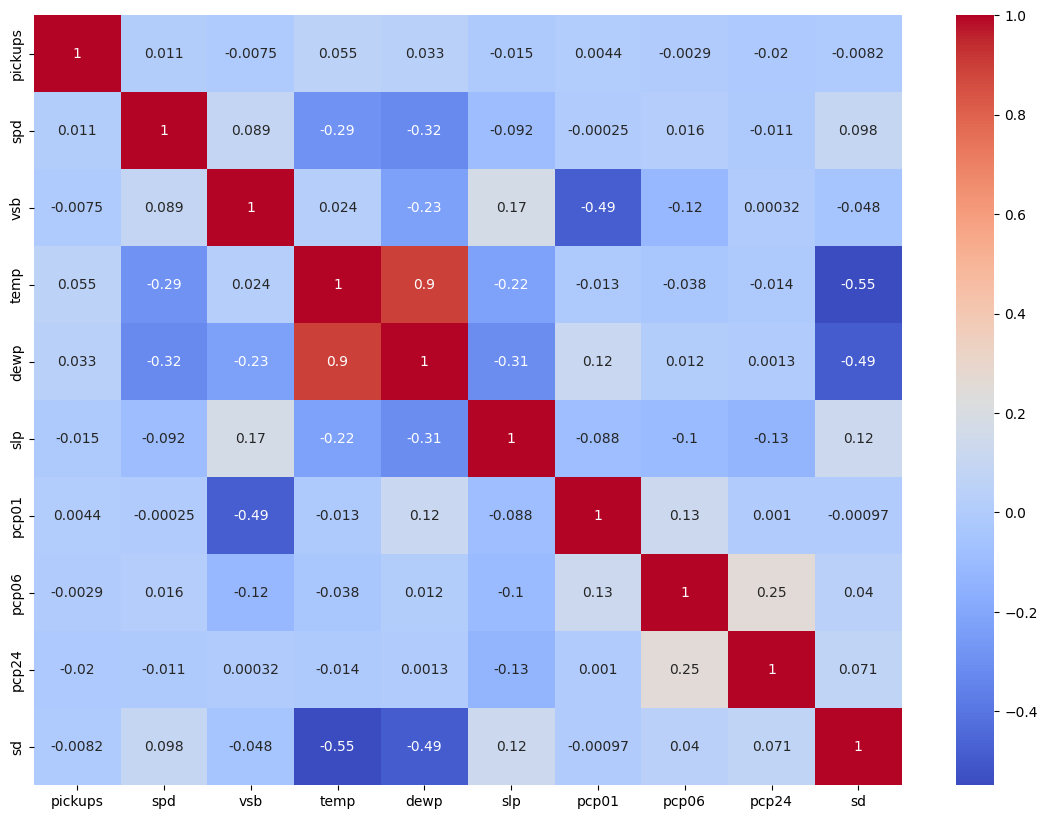

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',xticklabels=corr.columns, yticklabels=corr.columns)

# Task 2:
Plot a histogram boxplot for all numerical variables in the dataframe